# Introduction
State notebook purpose here

# Set environment
Import libraries and write settings here.

In [54]:
# data handling
import pandas as pd
import numpy as np

# visualization
import missingno as msno
import folium
from folium.plugins import FastMarkerCluster
import seaborn as sns
import matplotlib.pyplot as plt

## Import data

In [3]:
listings = pd.read_csv('listings.csv')
listings_details = pd.read_csv('listings_detailed.csv')

We can see that 'neihbourhood_group' is useless in the dataset, as it only contians NaN values, so we will drop this column.


Some missing values are also found in the columns concerning reviews, specifically in 'last_review' and 'reviews_per_month'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5289 non-null   int64  
 1   name                            5289 non-null   object 
 2   host_id                         5289 non-null   int64  
 3   host_name                       5289 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   5289 non-null   object 
 6   latitude                        5289 non-null   float64
 7   longitude                       5289 non-null   float64
 8   room_type                       5289 non-null   object 
 9   price                           5289 non-null   int64  
 10  minimum_nights                  5289 non-null   int64  
 11  number_of_reviews               5289 non-null   int64  
 12  last_review                     42

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,96033,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,Rafael & Adriana,NaN,Este,36.720310,-4.356270,Entire home/apt,23,5,89,2020-10-02,1.04,1,228
1,155696,"Wonderful sunny apartment, 2fl, very central",697056,Zeta,NaN,Centro,36.727230,-4.407200,Entire home/apt,180,3,18,2018-09-25,0.16,2,364
2,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.719340,-4.359420,Private room,17,5,69,2020-10-15,0.62,3,365
3,212845,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,Valle,NaN,Este,36.726060,-4.365410,Shared room,39,2,36,2020-09-30,0.34,2,301
4,229511,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,1198693,Joaquin,NaN,Este,36.790870,-4.381980,Entire home/apt,190,5,3,2020-07-26,0.08,1,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,46113565,GOODPLACES LARIOS,316795838,Renthas,NaN,Centro,36.720615,-4.420641,Entire home/apt,61,1,0,NaN,NaN,15,65
5285,46113566,GOODPLACES LARIOS,316795838,Renthas,NaN,Centro,36.720615,-4.420641,Entire home/apt,65,1,0,NaN,NaN,15,65
5286,46113567,GOODPLACES LARIOS,316795838,Renthas,NaN,Centro,36.720615,-4.420641,Entire home/apt,76,1,0,NaN,NaN,15,56
5287,46113568,GOODPLACES LARIOS,316795838,Renthas,NaN,Centro,36.720615,-4.420641,Entire home/apt,85,1,0,NaN,NaN,15,65


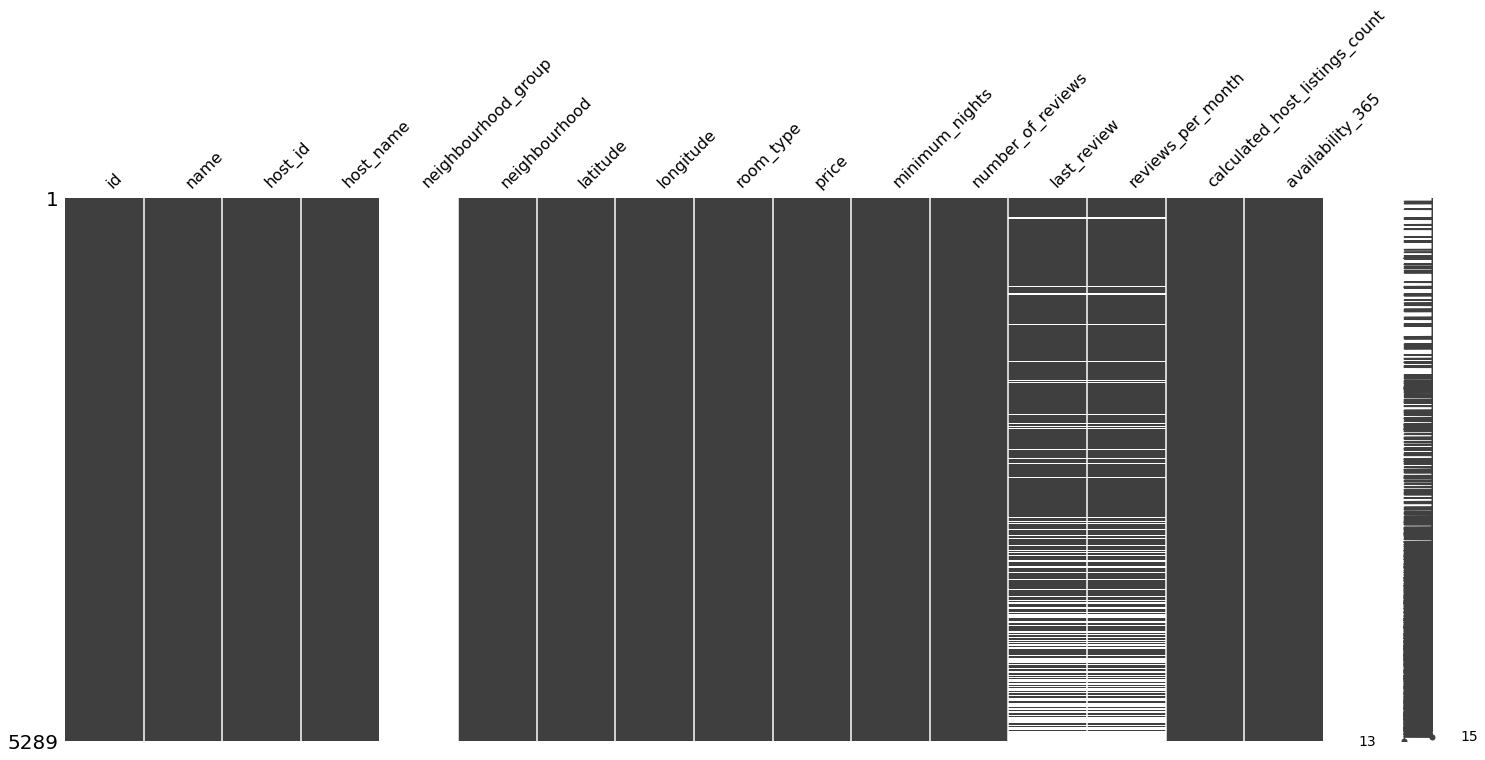

In [4]:
listings.info()
msno.matrix(listings)
display(listings)

In the extended dataset for listings we found 3 columns with only NaN values: 'neighbourhood_group_cleansed', 'bathrooms' and 'calendar_updated'. Another column with mostly NaN values is 'host_neighbourhood'.

We will drop these columns and keep only columns of interest for the current analysis.

We also see that certain columns as 'price' are the wrong data type. We will force the conversion to the correct data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5289 non-null   int64  
 1   listing_url                                   5289 non-null   object 
 2   scrape_id                                     5289 non-null   int64  
 3   last_scraped                                  5289 non-null   object 
 4   name                                          5289 non-null   object 
 5   description                                   5285 non-null   object 
 6   neighborhood_overview                         2941 non-null   object 
 7   picture_url                                   5289 non-null   object 
 8   host_id                                       5289 non-null   int64  
 9   host_url                                      5289 non-null   o

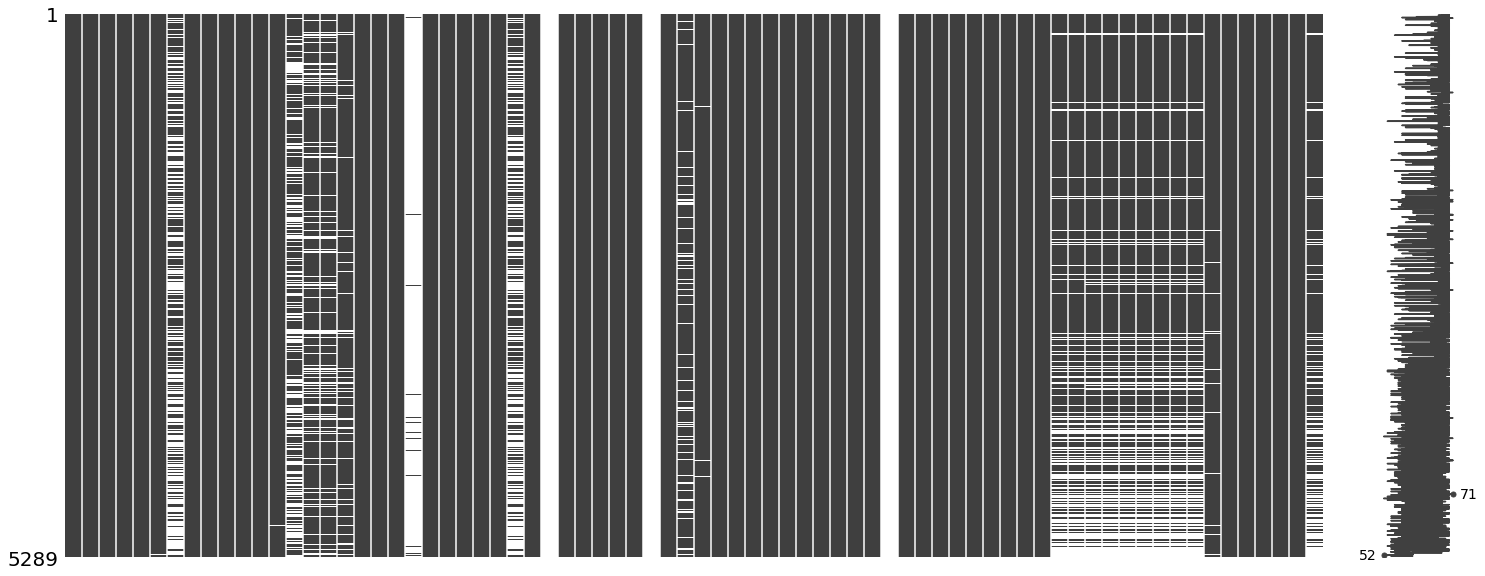

In [5]:
listings_details.info()
msno.matrix(listings_details)

# price contains string ($) so we will remove the dollar sign and force the conversion
listings_details['price'] = listings_details['price'].str.slice(start=1)

# force conversion
listings_details['price'] = listings_details['price'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Exploratory data analysis (EDA)

Let's print the head of 'listings' to see what king of information each column is offering us.

In [6]:
display(listings.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,96033,"* Cosy flat 200m from the beach, El Palo/Malaga *",510467,Rafael & Adriana,NaN,Este,36.72031,-4.35627,Entire home/apt,23,5,89,2020-10-02,1.04,1,228
1,155696,"Wonderful sunny apartment, 2fl, very central",697056,Zeta,NaN,Centro,36.72723,-4.40720,Entire home/apt,180,3,18,2018-09-25,0.16,2,364
2,166473,Perfect Location In Malaga,793360,Fred,NaN,Este,36.71934,-4.35942,Private room,17,5,69,2020-10-15,0.62,3,365
3,212845,BEAUTIFUL DOUBLE ROOM IN MALAGA,617998,Valle,NaN,Este,36.72606,-4.36541,Shared room,39,2,36,2020-09-30,0.34,2,301
4,229511,MOUNTAIN VILLA WITH SEAVIEWS - PRIVATE POOL,1198693,Joaquin,NaN,Este,36.79087,-4.38198,Entire home/apt,190,5,3,2020-07-26,0.08,1,364


Is it possible that each Airbnb room/flat have a different 'id'? or maybe this would be addressed by 'host_id'? Let's explore this!

We can see that 'id' has the same length as the DataFrame. Therefore, 'Id' is giving us a different id for each Airbnb accomodation. On the other hand, Host id has a unique id for each host, so if a host has 3 accomodations offered in the platform, they will be registered under the same host id.

We can also see that the three hosts in the top 3 with the highest number of Airbnb accomodations have 218, 66 and 65 places offered respectively!

In [7]:
print('Size of unique Id details: \n' + str(len(listings['id'].value_counts())))
print('\nSize of unique host id details: \n' + str(len(listings['host_id'].value_counts())))
print('\nHosts with the highest number of Airbnb accomodations offered: \n')
no_accomodations_per_host = listings.groupby(['host_id', 'host_name']).agg({'id': 'count'}).reset_index(drop=False)
no_accomodations_per_host.rename(columns={'id': 'n_accomodations'}, inplace=True)
display(no_accomodations_per_host.sort_values(by='n_accomodations', ascending=False).head())

Size of unique Id details: 
5289

Size of unique host id details: 
2327

Hosts with the highest number of Airbnb accomodations offered: 



,host_id,host_name,n_accomodations
1031,80225433,I Loft Malaga,218
138,5890675,La Recepción,66
1245,115528688,Trinidad,65
1126,94173177,Living4Malaga,61
1320,126429738,Steffen,56


## Map

First, let's create a map to visualize the number of hosts in the city of Málaga.

Let's extract the information of the location of each Airbnb host. In the listings DataFrame we have one column for the latitude and another for the longitude. We will zip both to use it in the interactive map.

We will locate the map in the following latitude and longitude, following data found in the web concerning the location of Málaga: (36.72016, -4.42034)

We can see in the map that most of the Airbnb hosts are located in the city of Malaga, while some place are found in the surrounding areas.

In [8]:
latitude = listings['latitude'].tolist()
longitude = listings['longitude'].tolist()
location_info = list(zip(latitude, longitude))

map_malaga = folium.Map(location=[36.72016, -4.42034],
                        zoom_start=12,
                        tiles='cartodbpositron')
FastMarkerCluster(location_info).add_to(map_malaga)
map_malaga

## Number of accomodations per neighbourhood

Let's explore then the number of accomodations offered by neighbourhood in Málaga.

We can see that Málaga Centro has the highest number of accomodations with 3591!, followed by Este with 578 and Carretera de Cádiz with 449.

,neighbourhood,id
0,Centro,3591
1,Este,578
2,Carretera de Cadiz,449
3,Cruz De Humilladero,229
4,Bailen-Miraflores,135
5,Churriana,104
6,Teatinos-Universidad,76
7,Ciudad Jardin,46
8,Palma-Palmilla,35
9,Puerto de la Torre,24


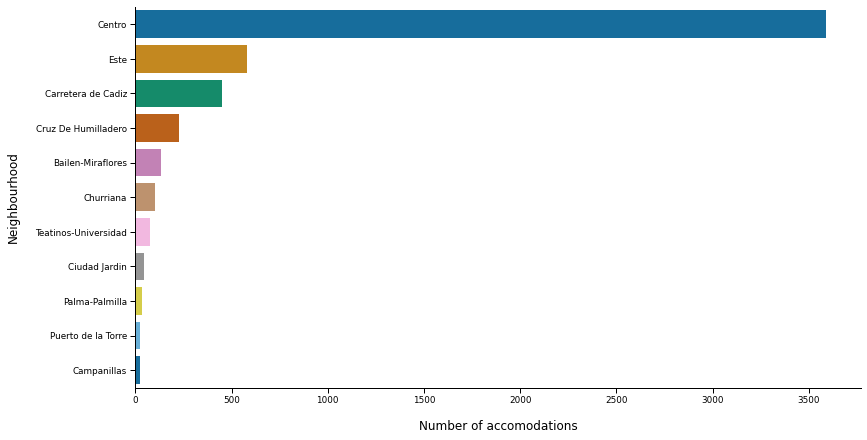

In [234]:
accomodations_per_neighbourhood = listings.groupby(['neighbourhood'])['id'].count().sort_values(ascending=False).reset_index()
display(accomodations_per_neighbourhood)

# plot
sns.set_context('paper')
ax, fig = plt.subplots(figsize=(13, 7))
sns.barplot(x='id', y='neighbourhood', data=accomodations_per_neighbourhood, orient='h', palette='colorblind')
plt.xlabel(xlabel='Number of accomodations', labelpad=15, fontsize=12)
plt.ylabel(ylabel='Neighbourhood', labelpad=15, fontsize=12)
sns.despine()

## Type of accomodation per neighbourhood

It will be quite interesting to know the type of accomodation that is offered in each neighbourhood, or if it is a tendency in some of them to offer certain type of rooms.

We could hypothesize that accomodations in Málaga Centro will be more 'private room' oriented, whereas in surrounding areas it could be possible to find more 'entire appartment' accomodations.

,neighbourhood,room_type,id
0,Centro,Entire home/apt,3122
1,Este,Entire home/apt,481
2,Centro,Private room,441
3,Carretera de Cadiz,Entire home/apt,328
4,Cruz De Humilladero,Entire home/apt,141
5,Carretera de Cadiz,Private room,121
6,Bailen-Miraflores,Entire home/apt,87
7,Cruz De Humilladero,Private room,87
8,Churriana,Entire home/apt,79
9,Este,Private room,78


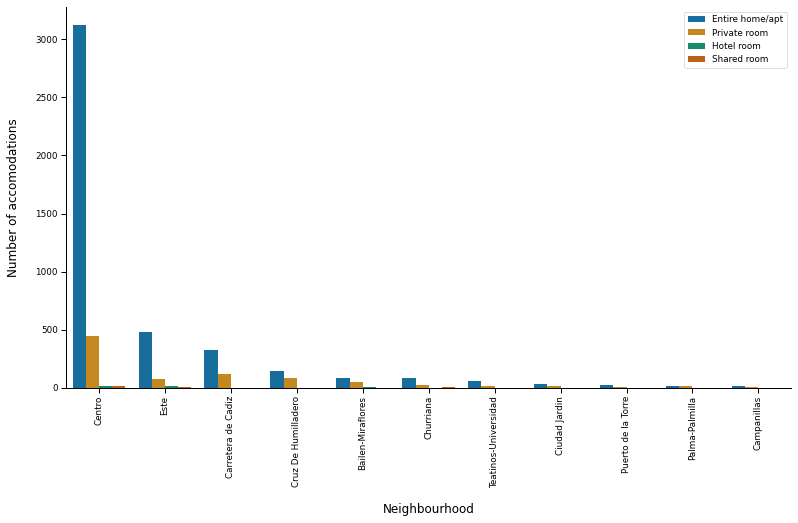

In [236]:
accomodations_per_neighbourhood_type = listings.groupby(['neighbourhood', 'room_type'])['id'].count().sort_values(ascending=False).reset_index()
display(accomodations_per_neighbourhood_type)

# plot
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(13, 7))
sns.barplot(x='neighbourhood', y='id', data=accomodations_per_neighbourhood_type, hue='room_type', orient='v', palette='colorblind')
plt.xlabel(xlabel='Neighbourhood', labelpad=15, fontsize=12)
plt.ylabel(ylabel='Number of accomodations', labelpad=15, fontsize=12)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
sns.despine()

## Price per neighbourhood and type of room

Now, let's see the the price per night in each neighbourhood and type of room. 

We have spotted some very extreme values in the sample, with entire apartments reaching 8000€, but even private rooms reaching more than that! Although this could be variabily in the sample, we will have to remove these outliers.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Este'),
  Text(1, 0, 'Centro'),
  Text(2, 0, 'Carretera de Cadiz'),
  Text(3, 0, 'Bailen-Miraflores'),
  Text(4, 0, 'Churriana'),
  Text(5, 0, 'Cruz De Humilladero'),
  Text(6, 0, 'Teatinos-Universidad'),
  Text(7, 0, 'Palma-Palmilla'),
  Text(8, 0, 'Puerto de la Torre'),
  Text(9, 0, 'Ciudad Jardin'),
  Text(10, 0, 'Campanillas')])

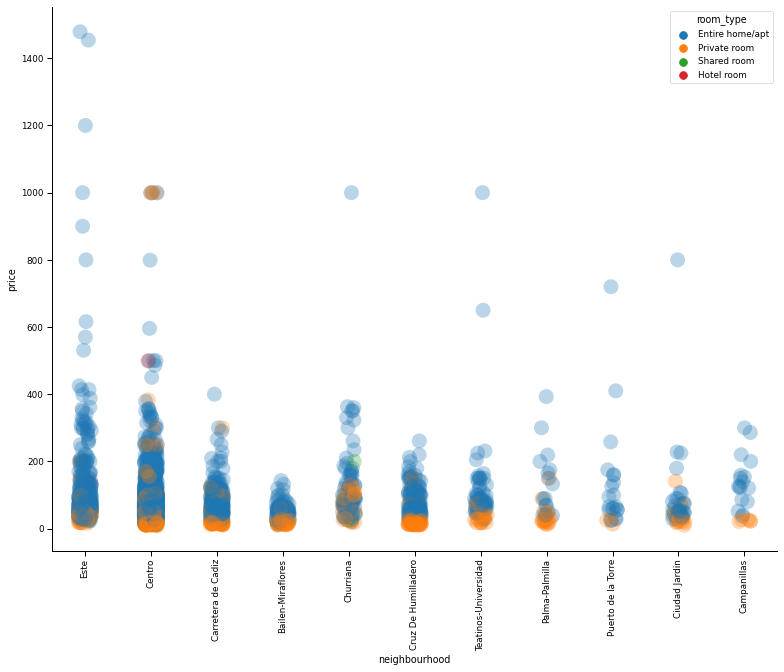

In [340]:
fig, ax = plt.subplots(figsize=(13, 10))
sns.stripplot(x='neighbourhood', y='price', data=listings, hue='room_type', size=15, alpha=.3)
sns.despine()
plt.xticks(rotation=90)

In research, a common criteria is to remove those values that are 2 standard deviations above or below the mean, so we will see if it is neccesary to apply that criterion to our sample after exploring those rooms in more detail.

Okay, so it seems that Moriya is renting his/her 'Grandiose Glorious Villa with Heated Outdoor Pool', as he asks for a minimum 91 nights, we will drop this case. However, looking for additional information in Airbnb website, it seems that Unisierra apartments cost around 80-100€ per night, so we will keep their price in 80€ as it seems to be an error. We will also keep the price of Hotel Zenit Malaga in 90€. We will set Francisco's apartment to the same 80€ as the other cases.

In [238]:
display(listings[listings['price'] > 5000])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
104,1867072,DISFRUTA EL CENTRO HISTÓRICO (4),9598080,Unisierra,NaN,Centro,36.72001,-4.42234,Entire home/apt,8000,2,3,2018-07-22,0.05,4,244
106,1888913,DISFRUTA EL CENTRO HISTÓRICO (5),9598080,Unisierra,NaN,Centro,36.72043,-4.42191,Entire home/apt,8000,2,1,2017-12-06,0.03,4,244
313,5451045,DISFRUTA EL CENTRO HISTORICO (1),9598080,Unisierra,NaN,Centro,36.71824,-4.42134,Entire home/apt,8000,2,13,2018-10-14,0.19,4,244
934,15787767,MALAGA CENTER DE LUXE FLAT,88872403,Francisco,NaN,Centro,36.72908,-4.41146,Entire home/apt,8000,1,37,2019-08-18,0.77,3,167
3508,36242110,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73337,-4.41487,Private room,9026,1,0,NaN,NaN,6,365
3509,36242819,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73645,-4.41108,Private room,9026,1,0,NaN,NaN,6,365
3510,36242906,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73728,-4.41227,Private room,9026,1,0,NaN,NaN,6,365
4382,42591580,Grandiose Glorious Villa with Heated Outdoor Pool,2770598,Moriya,NaN,Carretera de Cadiz,36.71018,-4.43351,Entire home/apt,9000,91,0,NaN,NaN,2,365


In [239]:
# drop Moriya's accomodation
listings.drop(listings.loc[listings['id']==42591580].index, inplace=True)

# define conditions
condition_zenit = (listings['host_name'] == 'Hotel Zenit Malaga') & (listings['price'] > 5000)
condition_unisierra = (listings['host_name'] == 'Unisierra') & (listings['price'] > 5000)
condition_francisco = (listings['host_name'] == 'Francisco') & (listings['price'] > 5000)

# modify prices
listings.loc[condition_zenit, 'price'] = 80
listings.loc[condition_unisierra, 'price'] = 91
listings.loc[condition_francisco, 'price'] = 80

listings[listings['host_name'].str.contains('Unisierra|Zenit')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
103,1836035,DISFRUTA EL CENTRO HISTÓRICO (3),9598080,Unisierra,NaN,Centro,36.71924,-4.42240,Entire home/apt,125,7,9,2017-12-17,0.11,4,67
104,1867072,DISFRUTA EL CENTRO HISTÓRICO (4),9598080,Unisierra,NaN,Centro,36.72001,-4.42234,Entire home/apt,91,2,3,2018-07-22,0.05,4,244
106,1888913,DISFRUTA EL CENTRO HISTÓRICO (5),9598080,Unisierra,NaN,Centro,36.72043,-4.42191,Entire home/apt,91,2,1,2017-12-06,0.03,4,244
313,5451045,DISFRUTA EL CENTRO HISTORICO (1),9598080,Unisierra,NaN,Centro,36.71824,-4.42134,Entire home/apt,91,2,13,2018-10-14,0.19,4,244
3508,36242110,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73337,-4.41487,Private room,80,1,0,NaN,NaN,6,365
3509,36242819,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73645,-4.41108,Private room,80,1,0,NaN,NaN,6,365
3510,36242906,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73728,-4.41227,Private room,80,1,0,NaN,NaN,6,365
4307,42087270,"Zenit Málaga, Doble con terraza",270940801,Hotel Zenit Malaga,NaN,Centro,36.73236,-4.41631,Private room,65,1,0,NaN,NaN,6,365
4308,42087332,"Zenit Málaga, Doble",270940801,Hotel Zenit Malaga,NaN,Centro,36.73228,-4.41624,Private room,45,1,0,NaN,NaN,6,365
4309,42087351,"Zenit Málaga, Doble Matrimonial",270940801,Hotel Zenit Malaga,NaN,Centro,36.73240,-4.41424,Private room,45,1,0,NaN,NaN,6,365


## Type of room per neighbourhood

As expected, we can see that at the bottom of the distribution of each neighbourhood we can find most of the private rooms offered in Airbnb website, whereas the rest of the distribution belong to entire apartments. However, we can see in Málaga Centro some private rooms with prices above 200€!

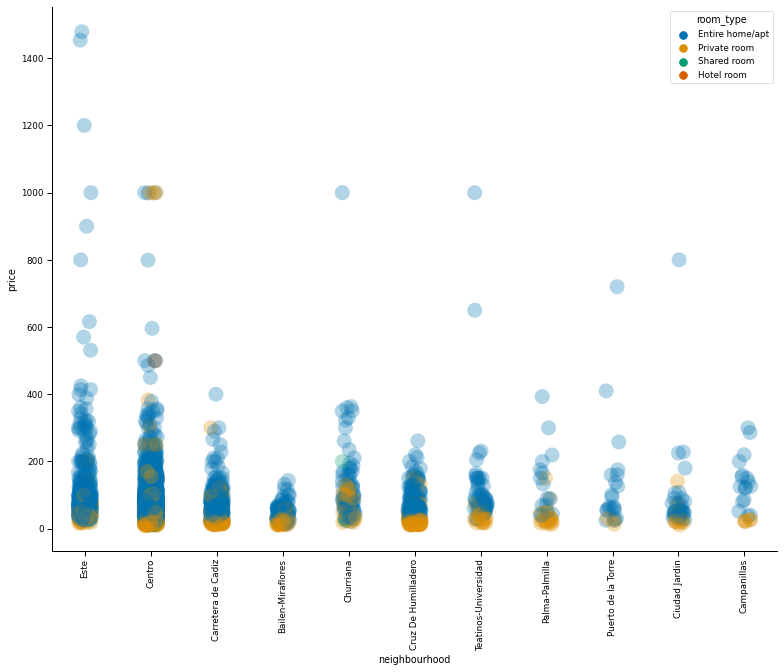

In [341]:
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(13, 10))
sns.stripplot(x='neighbourhood', y='price', data=listings, hue='room_type', palette='colorblind', size=15, alpha=.3)
plt.xticks(rotation=90)
sns.despine()

## Prices map

Now that we have fixed the outliers concerning prices, let's plot a scatter plot based on the locations of each accomodation, and using the price as a hue marker!

Oh! What a pity... not much difference is reflected in the scatter plot, so maybe it will be more convenient to create custom ranges of prices, for example, based on quantiles.

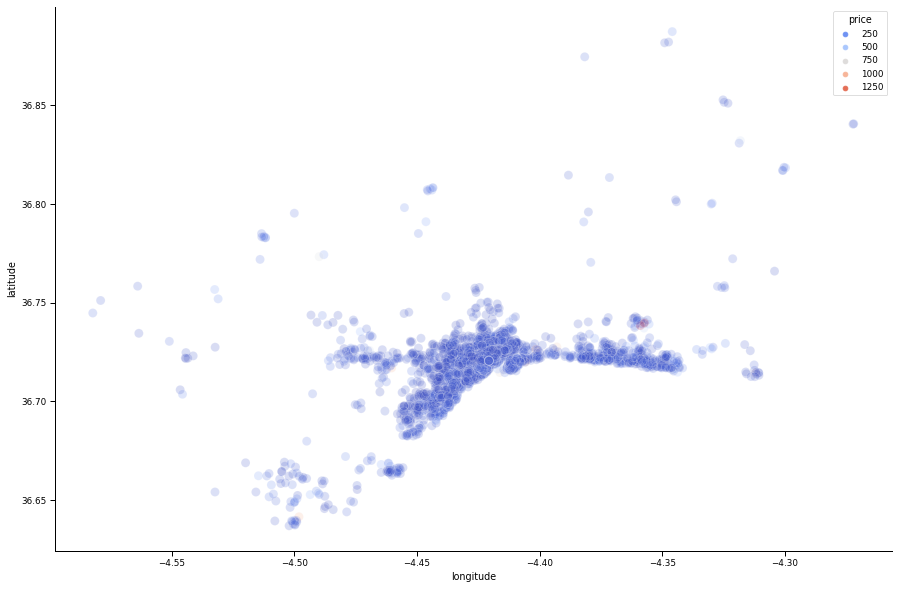

In [356]:
ax, fig = plt.subplots(figsize=(15, 10))
#colors = plt.cm.get_cmap('RdYlBu')
ax = sns.scatterplot(x='longitude', y='latitude', data=listings, hue='price', palette='coolwarm', alpha=.2, s=80)
sns.despine()

When we create out own ranges of prices based on percentiles, we can see a clear distinction of prices. As you go next to the coast the prices increase. This is quite normal, as people will be more willing to pay more just to be next to the beach, while most of the cheapest accomodations are in the interior part of the city. However, we find, some exceptions in the mountains. This could be related to bigger houses in the interior part of the province, that are often rented by big groups of people to spend a relaxed holidays.

It is interesting that most of the accomodations offered in Churriana are quite expensive. We know that Málaga-Costa del Sol airport is in that area, so it could be possible that these range of prices are due to this. 

It would be interesting to check if the size of the accomodation is related to its location, for that, we can use 'bedrooms' or 'property_type' columns from listings_details.

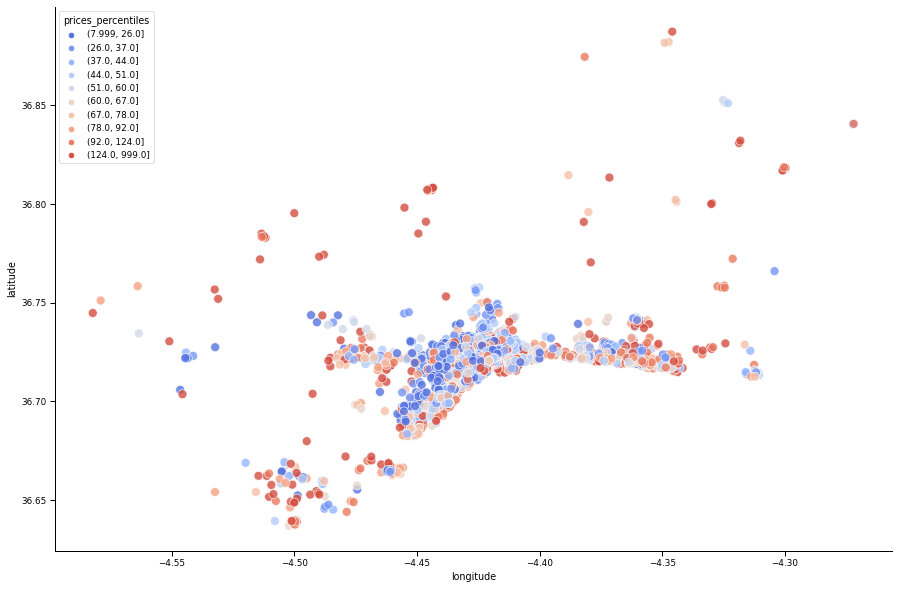

In [349]:
listings_details['prices_percentiles'] = pd.qcut(x=listings_details['price'], q=10)
fig, ax = plt.subplots(figsize=(15, 10))
#colors = plt.cm.get_cmap('RdYlBu')
sns.scatterplot(x='longitude', y='latitude', data=listings_details, hue='prices_percentiles', palette='coolwarm', alpha=.8, s=80)
sns.despine()

## Type of room map

This map is quite interesting. We can see that cose to the coast, most of the offered accomodations seem to be entire apartments, while you go the interior part of the city you can find private rooms most likely. This is quite expected, as the main attraction of Málaga is it's sunny beaches, and of course, most of the tourist would like to be next to the see enjoying the sun.

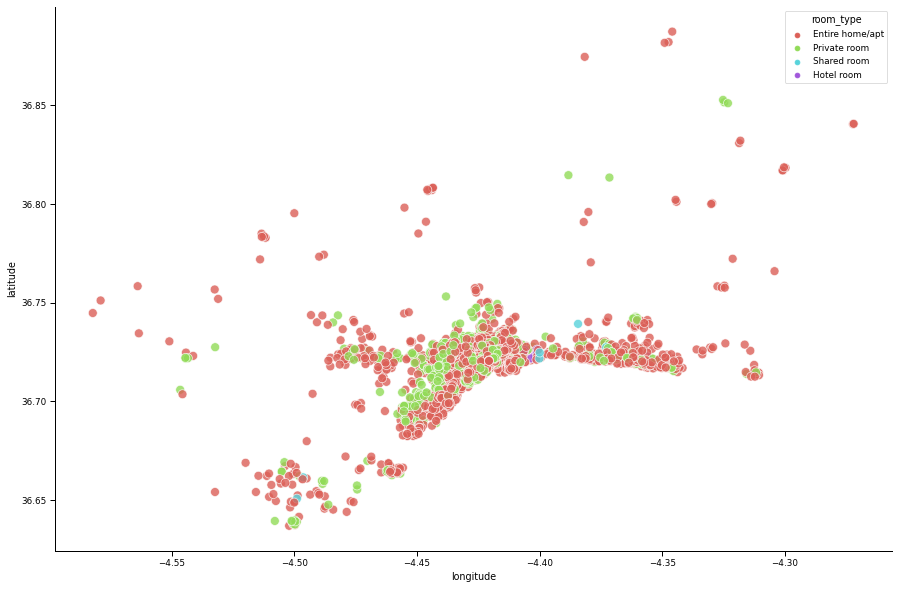

In [350]:
fig, ax = plt.subplots(figsize=(15, 10))
#colors = plt.cm.get_cmap('RdYlBu')
sns.scatterplot(x='longitude', y='latitude', data=listings, hue='room_type', palette='hls', alpha=.8, s=80)
sns.despine()

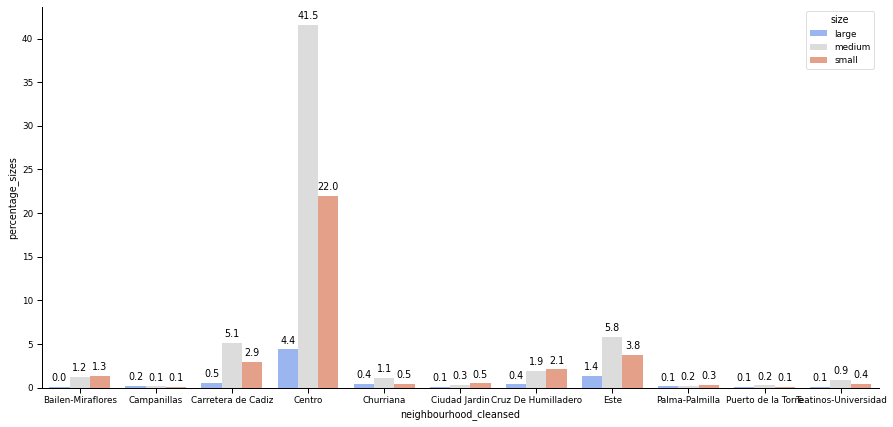

In [368]:
size_1 = (listings_details['accommodates'] <= 3)
size_2 = (listings_details['accommodates'] >= 4) & (listings_details['accommodates'] <= 7)
size_3 = (listings_details['accommodates'] >= 8) & (listings_details['accommodates'] <= 20)

listings_details['size'] = ''
listings_details.loc[size_1, 'size'] = 'small'
listings_details.loc[size_2, 'size'] = 'medium'
listings_details.loc[size_3, 'size'] = 'large'

perc_sizes_neighbourhood = listings_details.groupby(['neighbourhood_cleansed', 'size']).agg({'id': 'count'}).reset_index()
perc_sizes_neighbourhood['percentage_sizes'] = perc_sizes_neighbourhood.groupby(['neighbourhood_cleansed', 'size'])['id'].apply(lambda x: x * 100 / sum(perc_sizes_neighbourhood['id']))

fig, ax = plt.subplots(figsize=(15, 7))
g = sns.barplot(x='neighbourhood_cleansed', y='percentage_sizes', data=perc_sizes_neighbourhood, hue='size', orient='v', palette='coolwarm')
for note in g.patches:
    g.annotate(format(note.get_height(), '.1f'), (note.get_x() + note.get_width() / 2., note.get_height()), 
               ha='center', va='center', xytext=(0,9), textcoords='offset points')
sns.despine()

## Size of room and prices map

By this plot we can confirm that most of the accomodations far away from the city are medium and large sizes, so it is possible that these are appartaments mostly rented by groups.

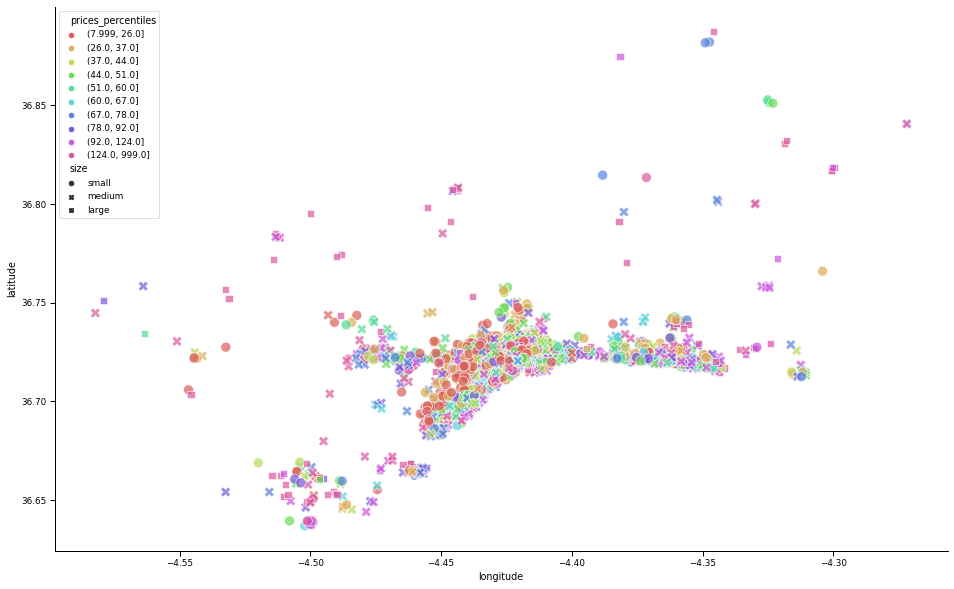

In [354]:
size_1 = (listings_details['accommodates'] <= 3)
size_2 = (listings_details['accommodates'] >= 4) & (listings_details['accommodates'] <= 7)
size_3 = (listings_details['accommodates'] >= 8) & (listings_details['accommodates'] <= 20)

listings_details['size'] = ''
listings_details.loc[size_1, 'size'] = 'small'
listings_details.loc[size_2, 'size'] = 'medium'
listings_details.loc[size_3, 'size'] = 'large'

fig, ax = plt.subplots(figsize=(16, 10))
#colors = plt.cm.get_cmap('RdYlBu')
sns.scatterplot(x='longitude', y='latitude', data=listings_details, hue='prices_percentiles', style='size', palette='hls', alpha=.7, s=100)
sns.despine()

## Superhost map

It seems that be a superhost is quite difficult, as we only have a few cases. We can also see that they are not distributed equally around the city.

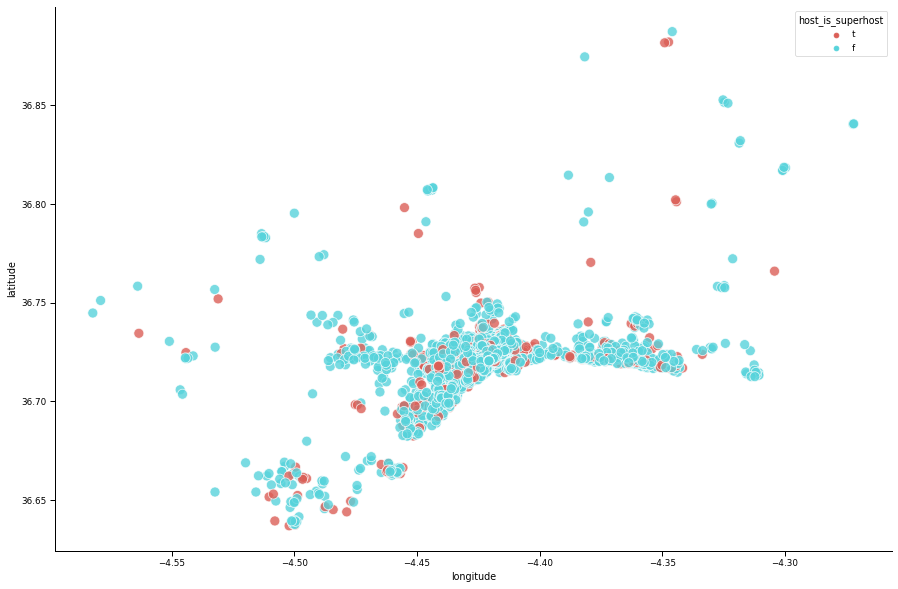

In [355]:
fig, ax = plt.subplots(figsize=(15, 10))
#colors = plt.cm.get_cmap('RdYlBu')
sns.scatterplot(x='longitude', y='latitude', data=listings_details, hue='host_is_superhost', palette='hls', alpha=.8,s=100)
sns.despine()

## Percentage of accomodations per size

Then, the majority of rooms offered in Airbnb Málaga are medium (58.40) and small size (33.94), whereas large rooms only represent 7.66% of the total of accomodations.

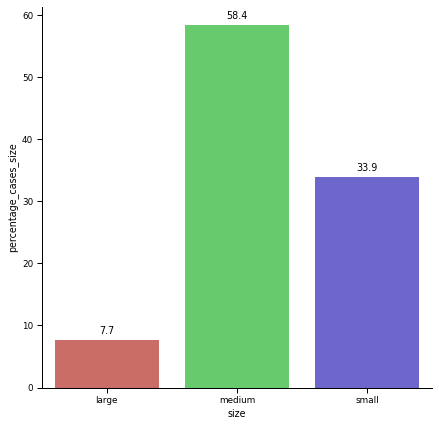

In [308]:
cases_size = listings_details.groupby(['size']).agg({'id': 'count'}).reset_index()
cases_size['percentage_cases_size'] = cases_size['id'] * 100 / sum(cases_size['id'])

sns.set_context('paper')
fig, ax = plt.subplots(figsize=(7, 7))
g = sns.barplot(x='size', y='percentage_cases_size', data=cases_size, orient='v', palette='hls')
for note in g.patches:
    g.annotate(format(note.get_height(), '.1f'), (note.get_x() + note.get_width() / 2., note.get_height()), 
               ha='center', va='center', xytext=(0,9), textcoords='offset points')
sns.despine()

## Percentage of accomodations per size and price group

We can see from this plot that the majority of large accomodations fall in the range between 92€ and 999€ per night, whereas the small accomodations are mostly in the range between 8€ and 50€ per night. The medium size accomodations are more balanced between differences ranges of prices.

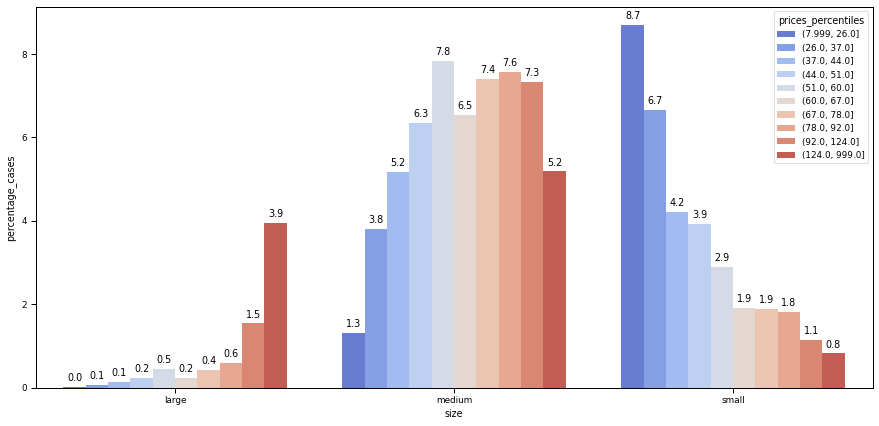

In [309]:
cases = listings_details.groupby(['prices_percentiles', 'size']).agg({'id': 'count'}).reset_index()
cases['percentage_cases'] = cases.groupby(['prices_percentiles', 'size'])['id'].apply(lambda x: x * 100 / sum(cases['id']))

fig, ax = plt.subplots(figsize=(15, 7))
g = sns.barplot(x='size', y='percentage_cases', data=cases, hue='prices_percentiles', orient='v', palette='coolwarm')
for note in g.patches:
    g.annotate(format(note.get_height(), '.1f'), (note.get_x() + note.get_width() / 2., note.get_height()), 
               ha='center', va='center', xytext=(0,9), textcoords='offset points')

## Association between variables

As we have a lot of variables in the dataset, let's keep only those of interest and explore the correlation between the variables.

In [66]:
variables = ['id', 
             'host_id',
             'latitude',
             'longitude',
             'neighbourhood_cleansed',
             'property_type',
             'room_type',
             'accommodates',
             'bedrooms',
             'beds',
             'price']

airbnb_filtered = listings_details[variables]
airbnb_filtered.info()
airbnb_filtered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5289 entries, 0 to 5288
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      5289 non-null   int64  
 1   host_id                 5289 non-null   int64  
 2   latitude                5289 non-null   float64
 3   longitude               5289 non-null   float64
 4   neighbourhood_cleansed  5289 non-null   object 
 5   property_type           5289 non-null   object 
 6   room_type               5289 non-null   object 
 7   accommodates            5289 non-null   int64  
 8   bedrooms                4853 non-null   float64
 9   beds                    5266 non-null   float64
 10  price                   5271 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 454.6+ KB


,id,host_id,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price
0,96033,510467,36.720310,-4.356270,Este,Entire apartment,Entire home/apt,3,2.0,2.0,23.0
1,155696,697056,36.727230,-4.407200,Centro,Entire condominium,Entire home/apt,5,3.0,5.0,180.0
2,166473,793360,36.719340,-4.359420,Este,Private room in apartment,Private room,3,1.0,0.0,17.0
3,212845,617998,36.726060,-4.365410,Este,Shared room in apartment,Shared room,2,1.0,2.0,39.0
4,229511,1198693,36.790870,-4.381980,Este,Entire house,Entire home/apt,12,4.0,10.0,190.0
...,...,...,...,...,...,...,...,...,...,...,...
5284,46113565,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,4,1.0,1.0,61.0
5285,46113566,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,5,2.0,2.0,65.0
5286,46113567,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,6,2.0,3.0,76.0
5287,46113568,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,5,2.0,3.0,85.0


## Explore the effect of categorical variables

### Explore categorical variables

Let's see how price is distributed between neighbourhoods. It is known that prices could have a non-normal distribution, so it could be possible that we will need to apply some transformation to data.

In [94]:
neighbourhoods_list = airbnb_filtered['neighbourhood_cleansed'].unique().tolist()
property_list = airbnb_filtered['property_type'].unique().tolist()
room_list = airbnb_filtered['room_type'].unique().tolist()

Wow! We have a lot of property type. I think that we should explore the sample size of each group. If the sample size of some groups is too small (I think that this would happen), we should exclude those groups or not consider this factor.


We see that quite a few categories have less than 10 cases. We should consider to recode this variable. As this is not the scope of this notebook and I am not an expert in Airbnb data, we are going to consider only 'room_type'

In [93]:
cases_size = airbnb_filtered.groupby(['property_type']).agg({'id': 'count'}).reset_index()
cases_size.rename(columns={'id': 'no_cases'}, inplace=True)
display(cases_size[cases_size['no_cases'] <= 10].sort_values(by='no_cases', ascending=True))

,property_type,no_cases
48,Shared room in hotel,1
36,Private room in vacation home,1
49,Shared room in house,1
46,Shared room in guesthouse,1
27,Private room in cottage,1
39,Room in bed and breakfast,1
23,Private room in camper/rv,1
41,Room in casa particular,1
17,Entire vacation home,1
12,Entire home/apt,1


### Explore distribution of price per neighbourhood

In [68]:
def plot_dist_per_group(df, list_of_groups, factor_column_name, dv_column_name, transformation=None):
      
    for group in list_of_groups:
        
        df_slice = df[df[factor_column_name] == group][dv_column_name]
        
        if transformation != None:
            df_slice = df_slice.apply(transformation)
        else:
            df_slice = df_slice
        
        print('Distribution for group: ' + str(group))
        fig, ax = plt.subplots(1, 2, figsize=(15,5))
        sns.distplot(df_slice, fit=norm, color='indianred', ax=ax[0])
        stats.probplot(df_slice.dropna(), plot=ax[1])
        plt.show()

As expected, the distribution of price is not normally distributed, that is why we will apply a log transformation and check the distribution again.

Distribution for group: Este


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


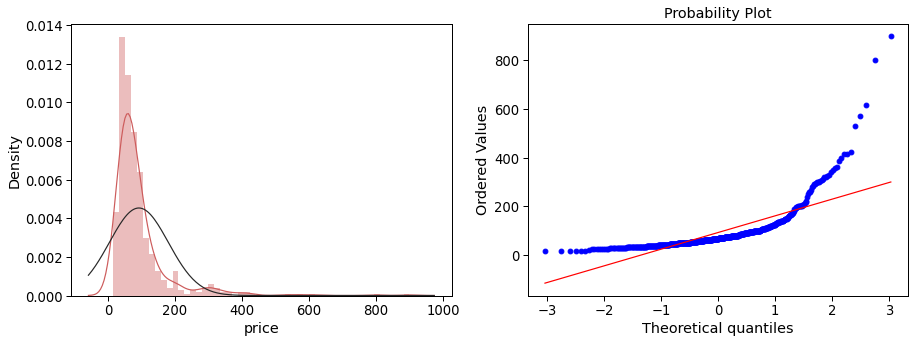

Distribution for group: Centro


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


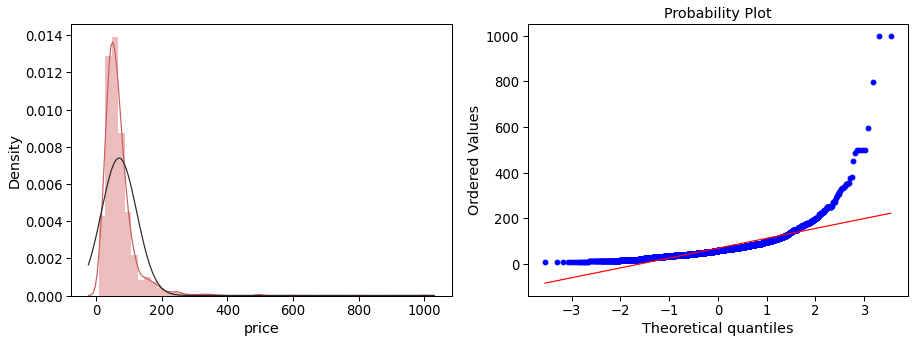

Distribution for group: Carretera de Cadiz


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


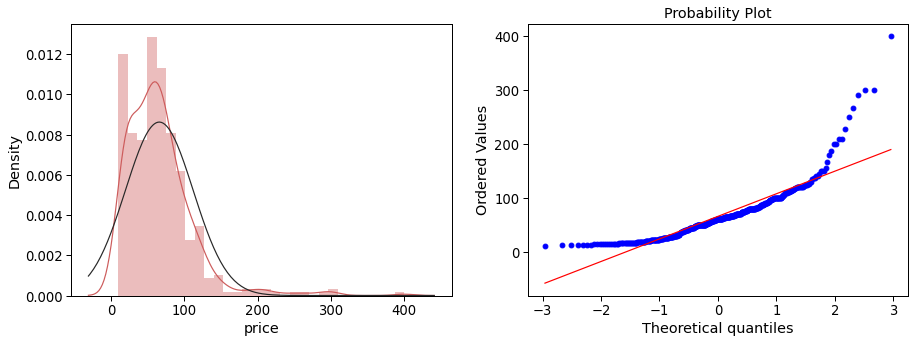

Distribution for group: Bailen-Miraflores


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


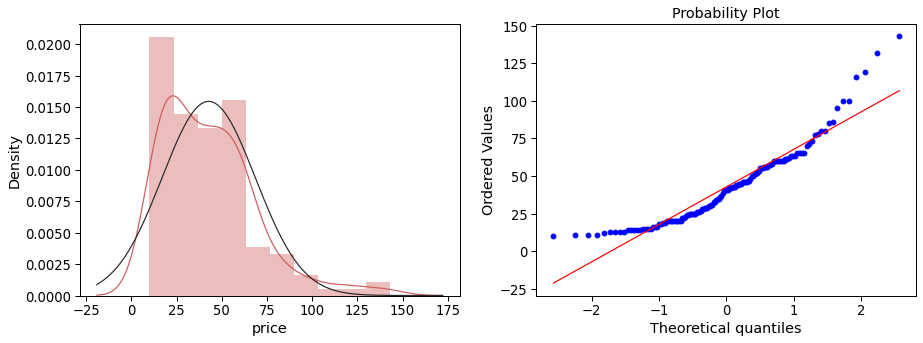

Distribution for group: Churriana


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


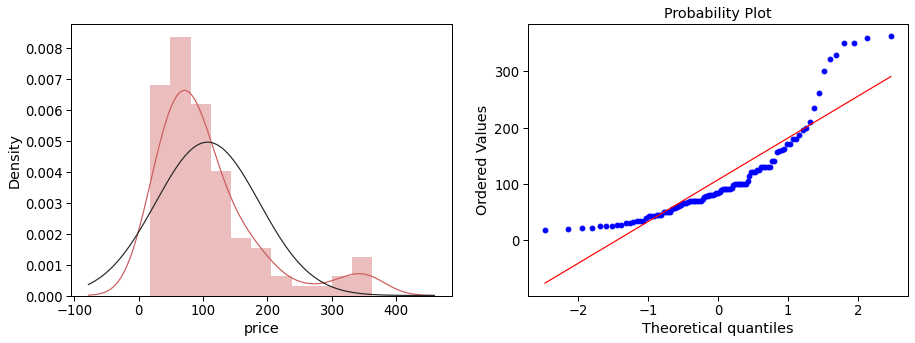

Distribution for group: Cruz De Humilladero


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


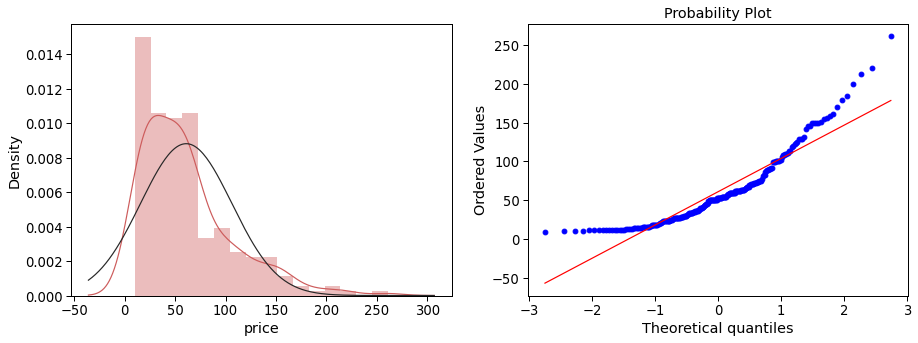

Distribution for group: Teatinos-Universidad


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


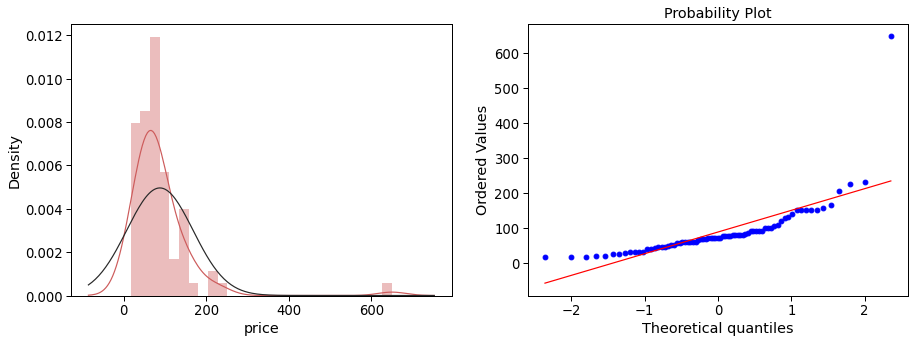

Distribution for group: Palma-Palmilla


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


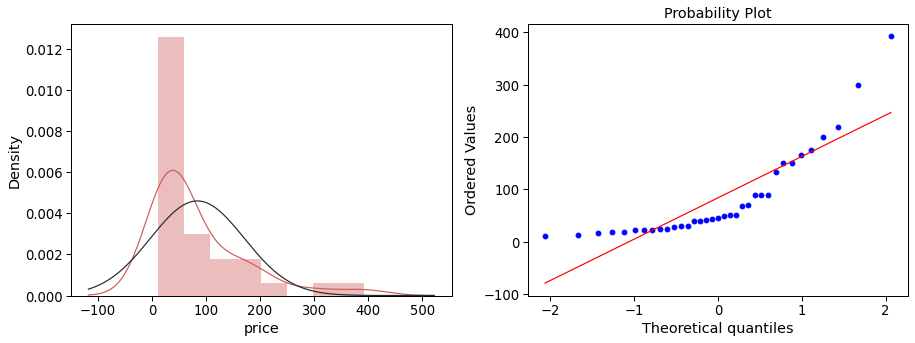

Distribution for group: Puerto de la Torre


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


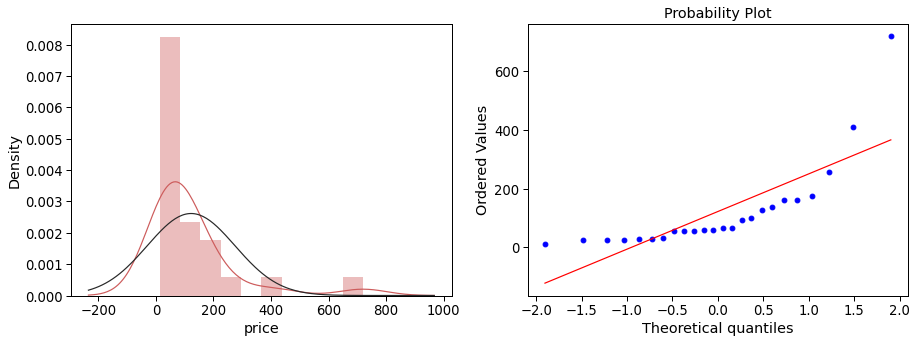

Distribution for group: Ciudad Jardin


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


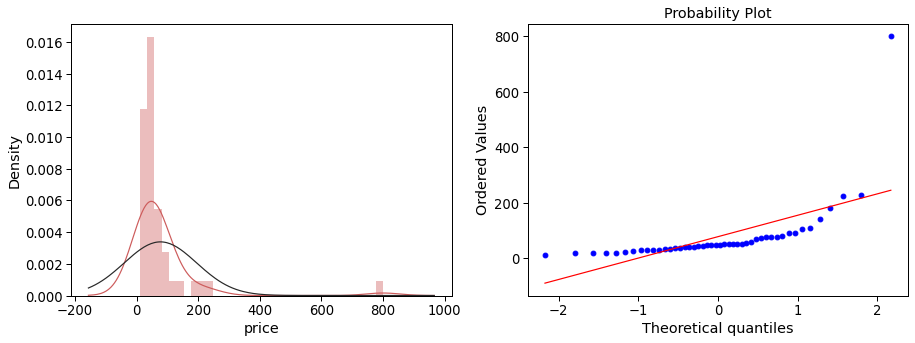

Distribution for group: Campanillas


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


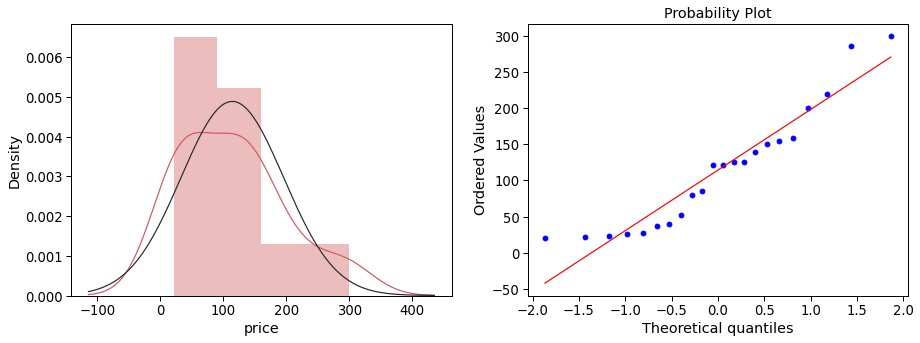

In [69]:
plot_dist_per_group(airbnb_filtered, neighbourhoods_list, 'neighbourhood_cleansed', 'price')

After applying a logarithmic transformation we see that the price distribution of each neighbourhood approximates to a normal distribution. We can chose to perform a non-parametric test as Kuskal-Wallis, as the distribution of some neighbourhood still is non-normal distributed. However, is not far from beign normal, so we will still go on with ANOVA analysis.

We should also consider that in some neighbourhoods the sample size is limited, compared to Centro and Este, which are easy to make normally distributed.

Distribution for group: Este


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


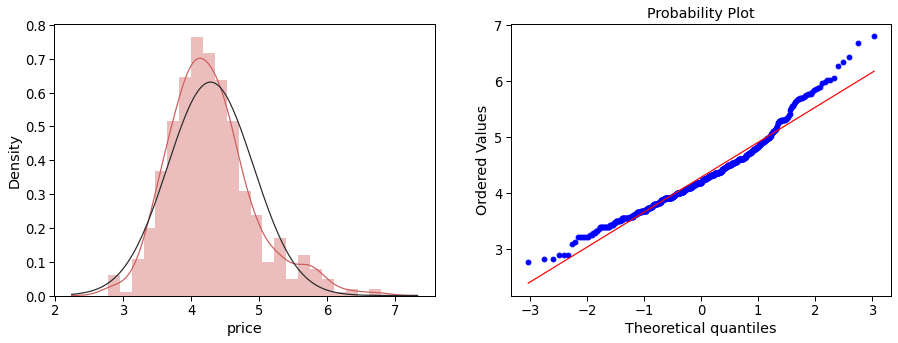

Distribution for group: Centro


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


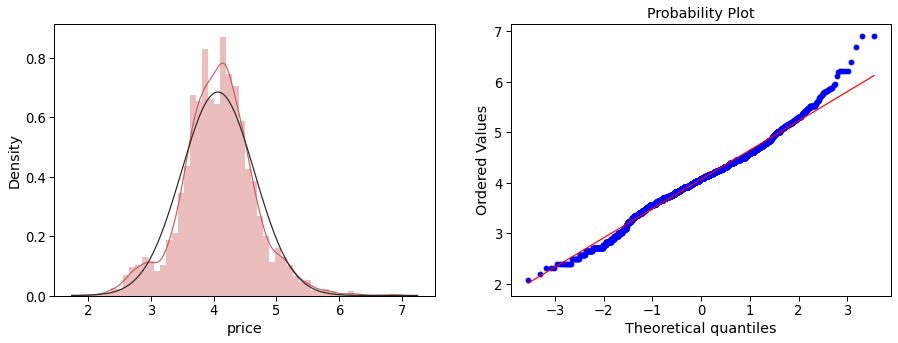

Distribution for group: Carretera de Cadiz


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


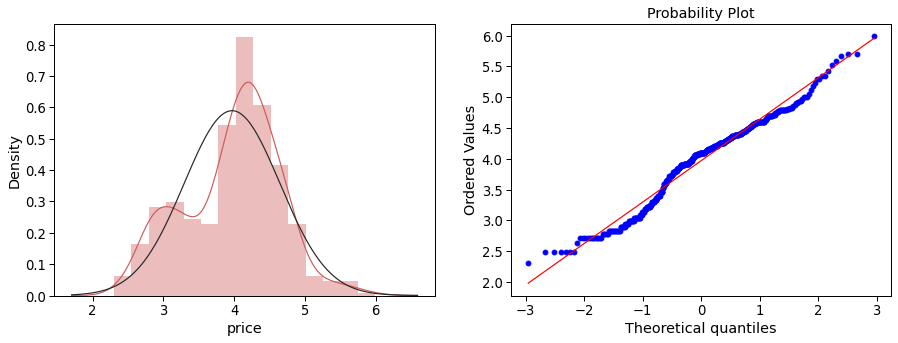

Distribution for group: Bailen-Miraflores


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


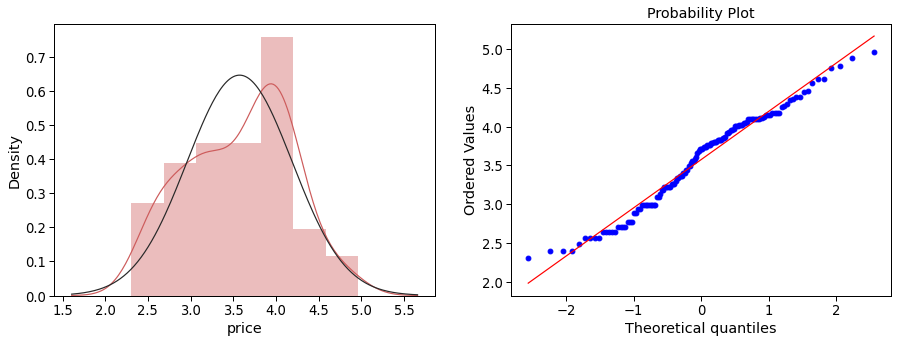

Distribution for group: Churriana


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


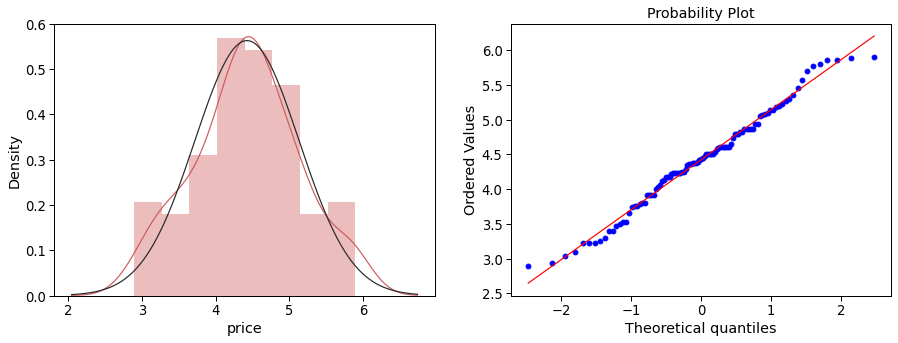

Distribution for group: Cruz De Humilladero


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


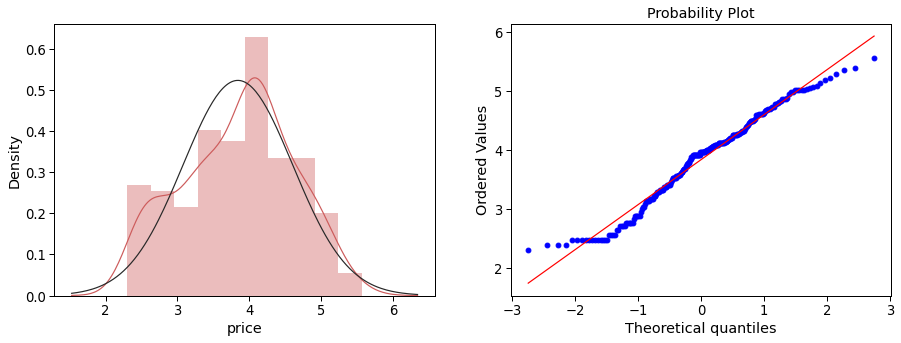

Distribution for group: Teatinos-Universidad


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


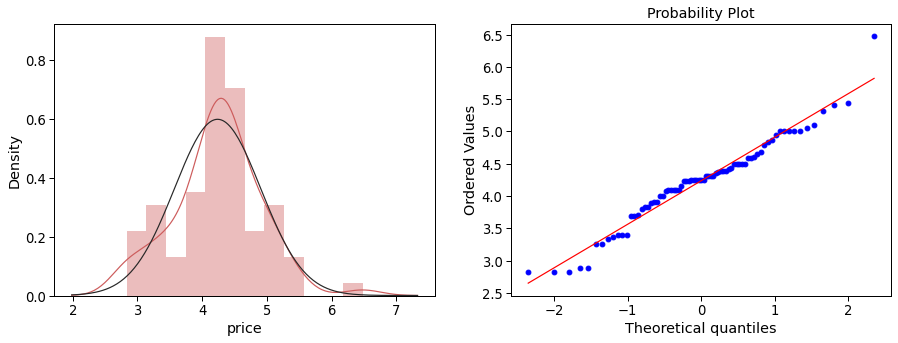

Distribution for group: Palma-Palmilla


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


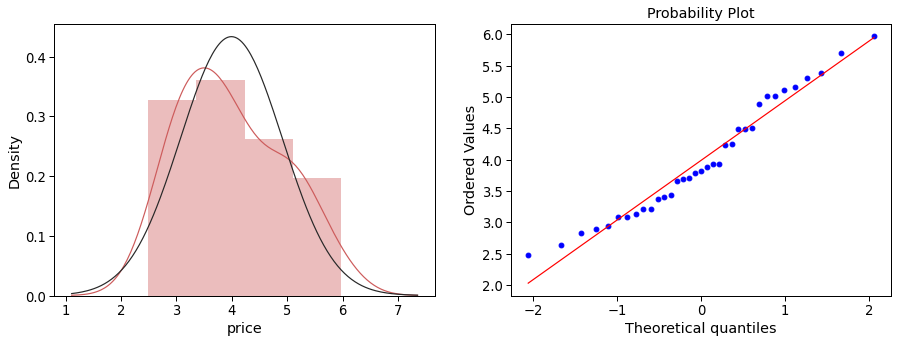

Distribution for group: Puerto de la Torre


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


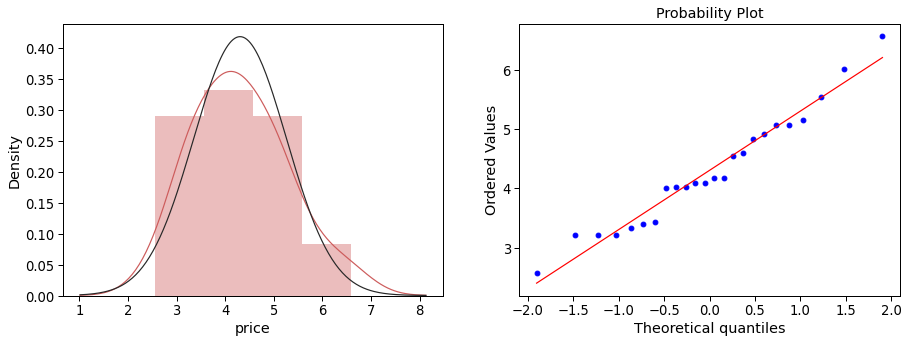

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distribution for group: Ciudad Jardin


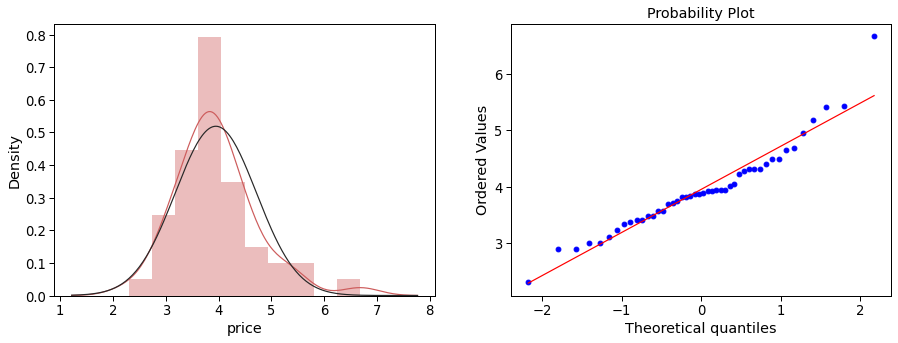

Distribution for group: Campanillas


C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


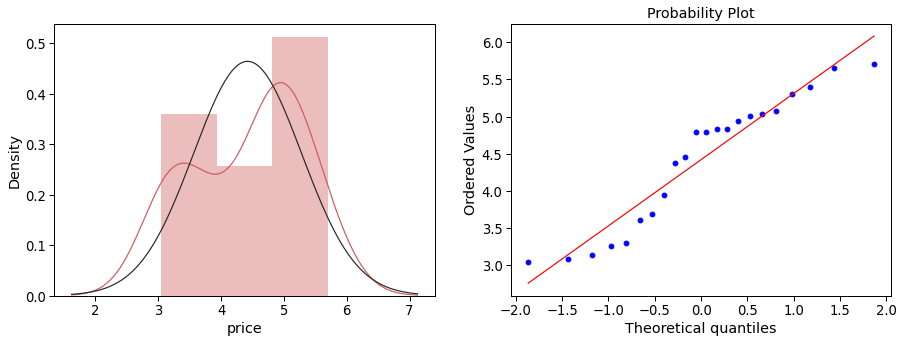

In [70]:
plot_dist_per_group(airbnb_filtered, neighbourhoods_list, 'neighbourhood_cleansed', 'price', np.log)

Apply transformation

In [71]:
airbnb_filtered['price_log'] = airbnb_filtered['price'].apply(np.log)
display(airbnb_filtered)

C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,host_id,latitude,longitude,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,price_log
0,96033,510467,36.720310,-4.356270,Este,Entire apartment,Entire home/apt,3,2.0,2.0,23.0,3.135494
1,155696,697056,36.727230,-4.407200,Centro,Entire condominium,Entire home/apt,5,3.0,5.0,180.0,5.192957
2,166473,793360,36.719340,-4.359420,Este,Private room in apartment,Private room,3,1.0,0.0,17.0,2.833213
3,212845,617998,36.726060,-4.365410,Este,Shared room in apartment,Shared room,2,1.0,2.0,39.0,3.663562
4,229511,1198693,36.790870,-4.381980,Este,Entire house,Entire home/apt,12,4.0,10.0,190.0,5.247024
...,...,...,...,...,...,...,...,...,...,...,...,...
5284,46113565,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,4,1.0,1.0,61.0,4.110874
5285,46113566,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,5,2.0,2.0,65.0,4.174387
5286,46113567,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,6,2.0,3.0,76.0,4.330733
5287,46113568,316795838,36.720615,-4.420641,Centro,Entire apartment,Entire home/apt,5,2.0,3.0,85.0,4.442651


### Differences in mean price per neighbourhood

Let's check now if there is a significant effect of categorical variables (neighbourhood, property type and room type)

As I am not currently employed in Airbnb, I do not know if there is a system that they use to code categorical variables as these. So in this case I am only going to explore if there is a significant effect of each categorical variable on the price. We will use Analysis of Variance (ANOVA) for this. This statistical method gives us an F statistics. It is know that the higher the F statistic, the higher the correlation will be with our dependent variable.

The test yield a F = 25.22 value using ANOVA over price. We will have to explore these differences between neighbourhoods performing t-tests. The same significant effect is yield in the not transformed data applying a non-parametric test as Kruskal-Wallis.

In any case, we should consider Neighbourhood as a significant factor to contribute to our models, as we find an association between price and neighbourhood.

In [76]:
import pingouin as pg
anova_neighbourhood = pg.anova(airbnb_filtered, dv='price_log', between='neighbourhood_cleansed', detailed=True, effsize='np2')
kruskal_neighbourhood = pg.kruskal(airbnb_filtered, dv='price', between='neighbourhood_cleansed', detailed=True)
display(anova_neighbourhood.round(3), kruskal_neighbourhood.round(3))

,Source,SS,DF,MS,F,p-unc,np2
0,neighbourhood_cleansed,96.642,10,9.664,25.229,0.0,0.046
1,Within,2014.850,5260,0.383,NaN,NaN,NaN


,Source,ddof1,H,p-unc
Kruskal,neighbourhood_cleansed,10,184.239,0.0


We will perform t-tests between different neighbourhood to see where the differences in prices arise. But first, let's explore how many neighbourhood we have.

Let's create first the possible combination between neighbourhoods and perform t-tests.

In [82]:
from itertools import combinations

def multiple_comparisons(df, list_of_groups, factor_column_name, dv_column_name):
    
    list_results = []
    list_comparisons = []
    
    comparisons = combinations(list_of_groups, 2)
    for name1, name2 in comparisons:
        comparison_tuple = (name1, name2)
        list_comparisons.append(comparison_tuple)

    for tuple_combo in list_comparisons:
        print('Performing t-test for comparison: ' + str(tuple_combo[0]) + ' and ' + str(tuple_combo[1]))
        x = df[df[factor_column_name] == tuple_combo[0]][dv_column_name]
        y = df[df[factor_column_name] == tuple_combo[1]][dv_column_name]
        result = pg.ttest(x=x, y=y, paired=False, tail='two-sided', correction='auto')
        result[['X', 'Y']] = tuple_combo[0], tuple_combo[1]
        list_results.append(result)
        final_results = pd.concat(list_results)
    
    return final_results

Let's perform the t-test comparisons between neighbourhood to dig deeper in the significant differences in Málaga.


We see that the mean price in Bailén-Miraflores is lower compared to the rest of the neighbourhoods, we will explain this in the next paragaph.


Interesting, we see that Carretera de Cadiz has a mean price lower than some neighbourhoods as Campanillas. In Campanillas we found the Technological Park, maybe this could explain why we have some higher prices, as we can find there more hotels or less Airbnb accomodations but more valuable as though for certain business purposes rathen than tourism. The same happens with Churriana, as we find there Málaga-Costa del Sol airport. We can see that also Teoatinos-Universidad is closer to the city center than Carretera de Cadiz. However, we see that Bailén-Miraflores has a lower mean price, this could be possible as Carretera de Cadiz is closer to the beach.


Center area has higher prices compared to Cruz de Humilladero and Bailén-Miraflores. However, Churriana and Campanillas have higher mean price. This could be possible because of the Technological Park and the airport.


Finally, we see that Este area is the most expensive! We all know that Centro area have the harbour, whereas Este have one of the most touristic areas of the city, plus some beautiful beaches. Si, it is not surprising that Este is more expensive than Carretera de Cadiz, Cruz del Humilladero and Bailén-Miraflores.

In [84]:
significant_ttest = multiple_comparisons(airbnb_filtered, neighbourhoods_list, 'neighbourhood_cleansed', 'price_log')

# show only significant t-tests
display(significant_ttest[significant_ttest['p-val'] <= .05].round(2).sort_values(by=['X', 'T'], ascending=True))

Performing t-test for comparison: Este and Centro
Performing t-test for comparison: Este and Carretera de Cadiz
Performing t-test for comparison: Este and Bailen-Miraflores
Performing t-test for comparison: Este and Churriana
Performing t-test for comparison: Este and Cruz De Humilladero
Performing t-test for comparison: Este and Teatinos-Universidad
Performing t-test for comparison: Este and Palma-Palmilla
Performing t-test for comparison: Este and Puerto de la Torre
Performing t-test for comparison: Este and Ciudad Jardin
Performing t-test for comparison: Este and Campanillas
Performing t-test for comparison: Centro and Carretera de Cadiz
Performing t-test for comparison: Centro and Bailen-Miraflores
Performing t-test for comparison: Centro and Churriana
Performing t-test for comparison: Centro and Cruz De Humilladero
Performing t-test for comparison: Centro and Teatinos-Universidad
Performing t-test for comparison: Centro and Palma-Palmilla
Performing t-test for comparison: Centro a

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power,X,Y
T-test,-9.66,202.32,two-sided,0.00,"[-1.02, -0.68]",1.29,4.901e+15,1.00,Bailen-Miraflores,Churriana
T-test,-7.05,142.69,two-sided,0.00,"[-0.85, -0.48]",1.04,2.907e+08,1.00,Bailen-Miraflores,Teatinos-Universidad
T-test,-4.35,24.49,two-sided,0.00,"[-1.25, -0.45]",1.28,717.903,1.00,Bailen-Miraflores,Campanillas
T-test,-3.62,327.75,two-sided,0.00,"[-0.41, -0.12]",0.37,59.552,0.93,Bailen-Miraflores,Cruz De Humilladero
T-test,-3.56,26.39,two-sided,0.00,"[-1.16, -0.31]",1.07,53.374,1.00,Bailen-Miraflores,Puerto de la Torre
T-test,-2.97,65.52,two-sided,0.00,"[-0.63, -0.12]",0.57,9.669,0.91,Bailen-Miraflores,Ciudad Jardin
T-test,-2.51,42.05,two-sided,0.02,"[-0.75, -0.08]",0.60,3.288,0.88,Bailen-Miraflores,Palma-Palmilla
T-test,-5.90,147.42,two-sided,0.00,"[-0.61, -0.3]",0.67,1.504e+06,1.00,Carretera de Cadiz,Churriana
T-test,-3.19,100.84,two-sided,0.00,"[-0.43, -0.1]",0.40,16.839,0.89,Carretera de Cadiz,Teatinos-Universidad
T-test,-2.38,22.24,two-sided,0.03,"[-0.85, -0.06]",0.66,2.694,0.85,Carretera de Cadiz,Campanillas


### Differences in mean price per room type

We also find differences based on room type.

Significant differences are found between entire accomodations with shared room and private room. As expected, the entire accomodation is more expensive that a shared or private room. Also, a Hotel room is more expensive than a private or shared room.

In [87]:
anova_room = pg.anova(airbnb_filtered, dv='price_log', between='room_type', detailed=True, effsize='np2')
kruskal_room = pg.kruskal(airbnb_filtered, dv='price', between='room_type', detailed=True)

t_tests = multiple_comparisons(airbnb_filtered, room_list, 'room_type', 'price_log')
significant_comparisons = t_tests[t_tests['p-val'] <= .05].round(2).sort_values(by=['X', 'T'], ascending=True)

display(anova_property.round(3), kruskal_property.round(3), significant_comparisons)

Performing t-test for comparison: Entire home/apt and Private room
Performing t-test for comparison: Entire home/apt and Shared room
Performing t-test for comparison: Entire home/apt and Hotel room
Performing t-test for comparison: Private room and Shared room
Performing t-test for comparison: Private room and Hotel room
Performing t-test for comparison: Shared room and Hotel room


,Source,SS,DF,MS,F,p-unc,np2
0,property_type,731.224,50,14.624,55.308,0.0,0.346
1,Within,1380.268,5220,0.264,NaN,NaN,NaN


,Source,ddof1,H,p-unc
Kruskal,property_type,50,1447.357,0.0


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power,X,Y
T-test,6.97,17.09,two-sided,0.0,"[0.76, 1.42]",2.05,1.33e+09,1.0,Entire home/apt,Shared room
T-test,35.38,1076.56,two-sided,0.0,"[0.79, 0.88]",1.52,4.937e+241,1.0,Entire home/apt,Private room
T-test,-9.79,37.62,two-sided,0.0,"[-1.04, -0.68]",1.35,1.759e+18,1.0,Private room,Hotel room
T-test,-6.27,27.43,two-sided,0.0,"[-1.48, -0.75]",2.00,1.24e+05,1.0,Shared room,Hotel room


### Explore the distribution of numerical variables

Okay, phew! That looks like a lot of tests. Now that we have finished with categorical variables (that I did not want to recode as I am not an expert in Airbnb data, unless they want to hire and training me (wink, wink Airbnb...)), let's explore correlations between continuous variables.

But first! We should explore the distribution of these variables, just to know if should apply Pearson or Spearman method.

In [108]:
def plot_dist(df, dv_list, transformation=None):
      
    for dv in dv_list:
        
        fig, ax = plt.subplots(1, 2, figsize=(15,5))
        sns.distplot(df[dv], fit=norm, color='indianred', ax=ax[0])
        stats.probplot(df[dv].dropna(), plot=ax[1])
        plt.show()

Let's keep only numerical variables of interest

In [109]:
num_variables = ['latitude',
                 'longitude',
                 'accommodates',
                 'bedrooms',
                 'beds',
                 'price',
                 'price_log']

So from the distribution we can see that longitude have a normal distribution. Latitute could be considered normally distributed, but it has a left skew. And obviously the rest of variables (accomodates, bedrooms and beds) are not normally distributed. So we will apply Spearman method for correlation.

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


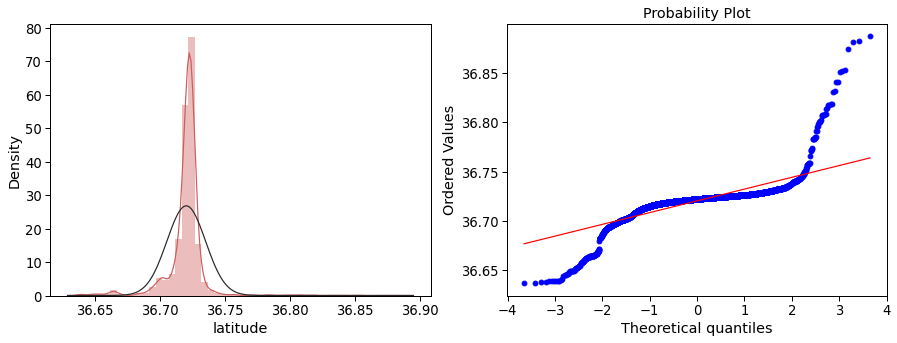

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


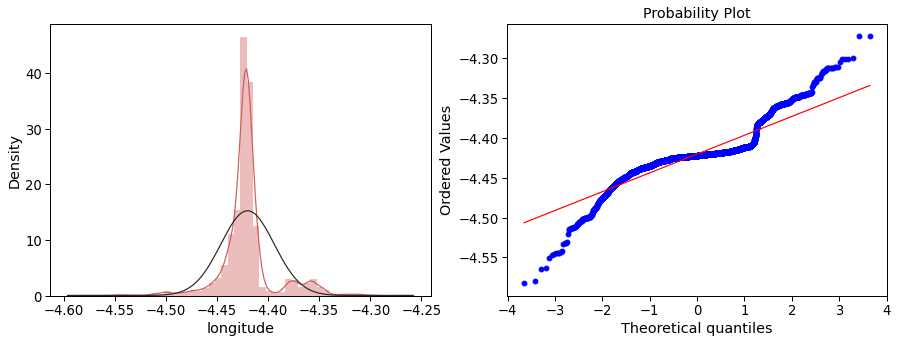

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


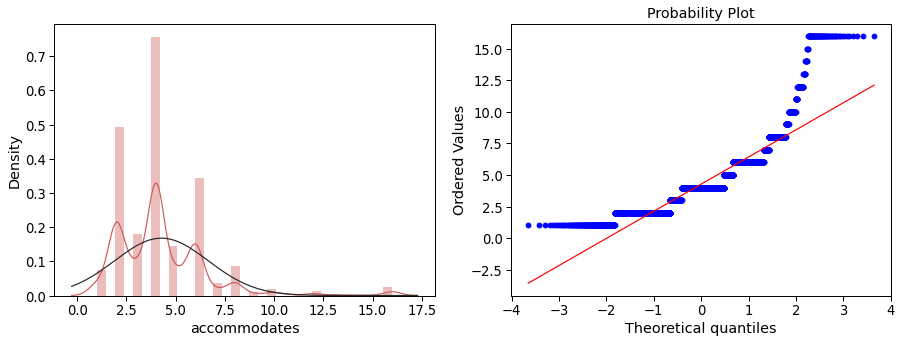

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


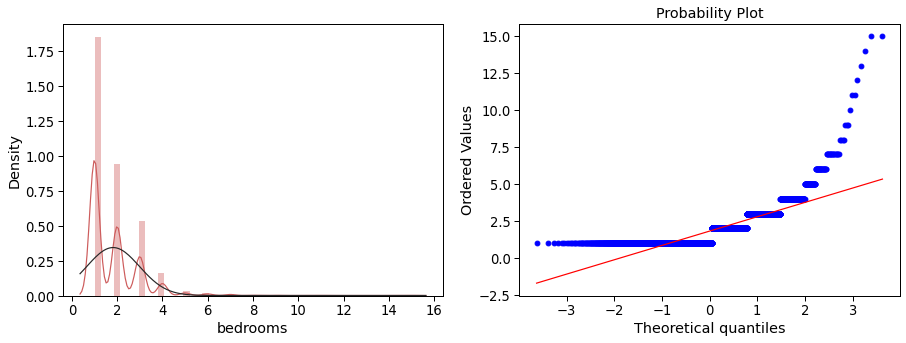

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


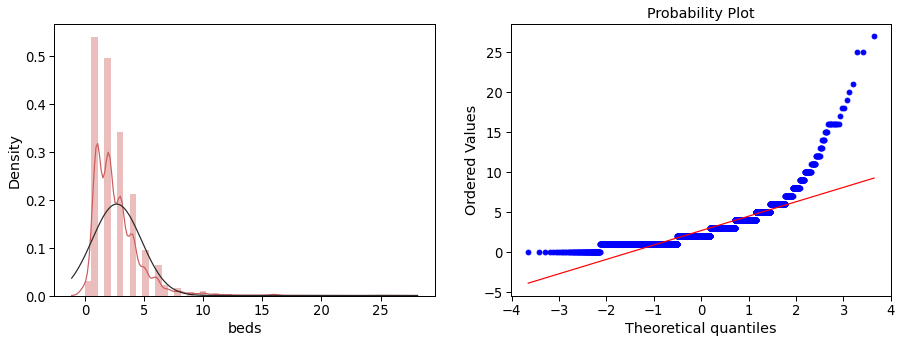

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


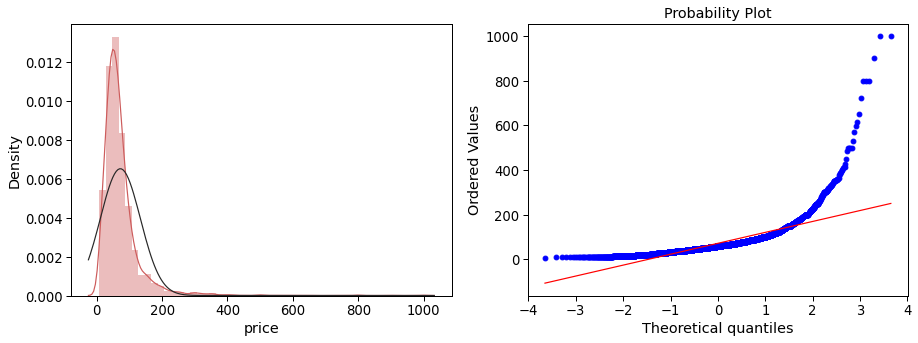

C:\Users\sebas\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


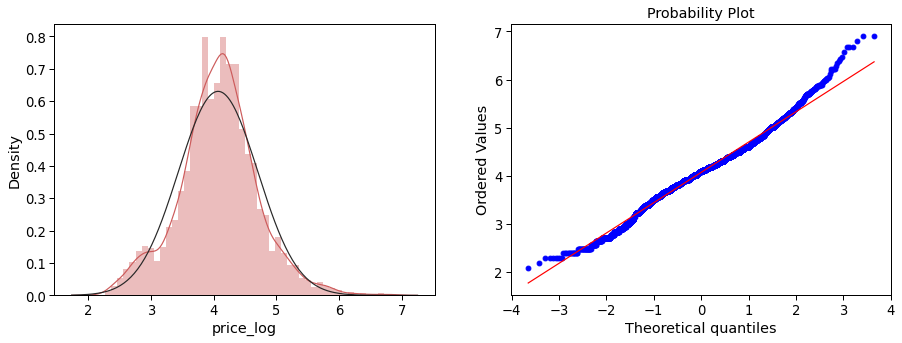

In [110]:
plot_dist(airbnb_filtered, num_variables)

### Association between continuous variables

I always have love to see the correlation tables in a triangle shape, I have found this code in Bibor Szabo in Medium. Thank you so much for merging this type of tables with heatmaps!

We can see that the higher the number of persons a host can accomodates, number of bedrooms and beds, the higher the price. However, we don't find any correlation of price with longitude and latitude, interesting... I was expecting to find and association at least with latitude. Maybe we don't have much variability in the latitude...

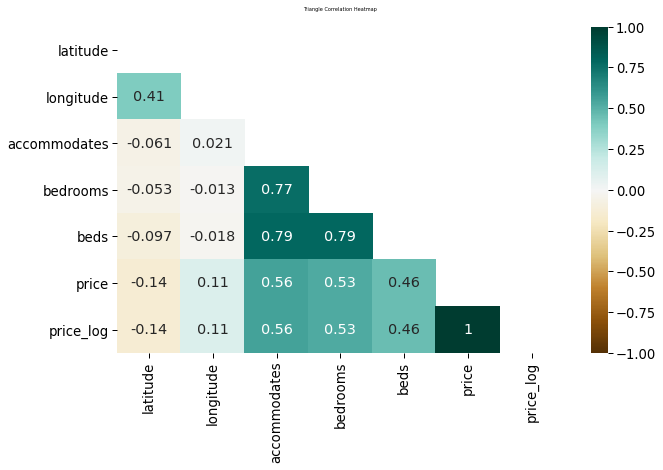

In [111]:
np.triu(np.ones_like(airbnb_filtered[num_variables].corr(method='spearman')))
plt.figure(figsize=(10, 6))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(airbnb_filtered[num_variables].corr(method='spearman'), dtype=np.bool))
heatmap = sns.heatmap(airbnb_filtered[num_variables].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':5}, pad=16);

# Regression
Hacer regression lineal primero con variables continuas. Interesante hacer Regression Cuantil.


Hacer regression Lasso para quedarse con los predictores más importantes


Usar GridSeachCV para buscar los predictores más importantes


Hacer Ridge Regression

# Conclusions and Next Steps
Summarize findings here